In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  
plt.rcParams['figure.figsize'] = (15, 16)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [3]:
angle_left = np.arange(-45, 5, 5)
volt_left = np.array([2.16, 2.02, 1.92, 1.80, 1.70, 1.60, 1.48, 1.37, 1.27, 1.17])[::-1]
# angle_right = np.arange(0, 50, 5)
# volt_right = np.array([2.16, 2.25, 2.42, 2.51, 2.66, 2.77, 2.92, 3.00, 3.25, 3.41])
angle_right = np.arange(5, 50, 5)
volt_right = np.array([2.25, 2.42, 2.51, 2.66, 2.77, 2.92, 3.00, 3.25, 3.41])
print(volt_left)
print(angle_left)
print(volt_right)
print(angle_right)

[1.17 1.27 1.37 1.48 1.6  1.7  1.8  1.92 2.02 2.16]
[-45 -40 -35 -30 -25 -20 -15 -10  -5   0]
[2.25 2.42 2.51 2.66 2.77 2.92 3.   3.25 3.41]
[ 5 10 15 20 25 30 35 40 45]


41.0174604602803 -89.97935536760436


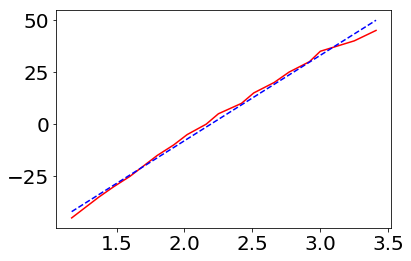

In [4]:
# plt.plot(volt_left, angle_left, 'b-')
# plt.plot(volt_right, angle_right, 'r-')
volt = np.concatenate((volt_left, volt_right))
angle = np.concatenate((angle_left, angle_right))
k, b = np.polyfit(volt,angle,1)
plt.plot(volt, angle, 'r-')
plt.plot(volt, k*volt+b, 'b--')
print(k, b)

In [5]:
# fixed point is 0 steering angle, n is 1
def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]

In [9]:
volt_fix = np.array([2.16])
angle_fix = np.array([0])
k_f, b_f = polyfit_with_fixed_points(1, volt, angle, volt_fix, angle_fix)

In [ ]:
plt.plot(volt, angle, 'r-')
plt.plot(volt, k*volt+b, 'b--')